<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/02_02_maze_solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maze solver

In [1]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git
import algorithmic_complexity.mazebuilder as mb
import matplotlib.pyplot as plt

Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 36 (delta 16), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (36/36), done.


In [4]:
def drawMaze(maze, size=15):
  _, ax = plt.subplots(figsize=(size, size))
  ax.imshow(maze)
  ax.axis("off")

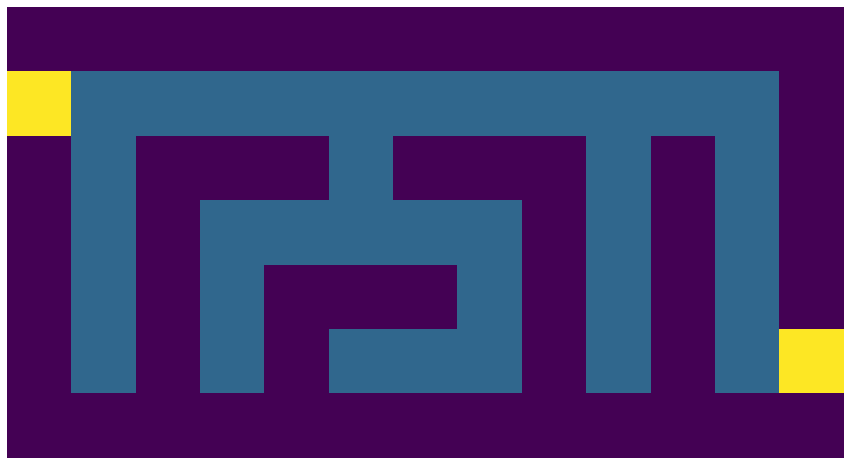

In [5]:
maze = mb.makeMaze(3, 6)
drawMaze(maze)

In [6]:
maze

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [7]:
type(maze)

numpy.ndarray

In [8]:
def mazeSolver(maze, row, col, rowF, colF):
  maze[row, col] = 3  # camino correcto (amarillo)
  if row == rowF and col == colF:
    drawMaze(maze)
    return True

  nextSteps = [(row, col+1), (row+1, col), (row, col-1), (row-1, col)]
  for nextR, nextC in nextSteps:
    if maze[nextR, nextC] == 1 and mazeSolver(maze, nextR, nextC, rowF, colF):
      return True

  maze[row, col] = 2  # por aquí no era (verde)
  return False

True

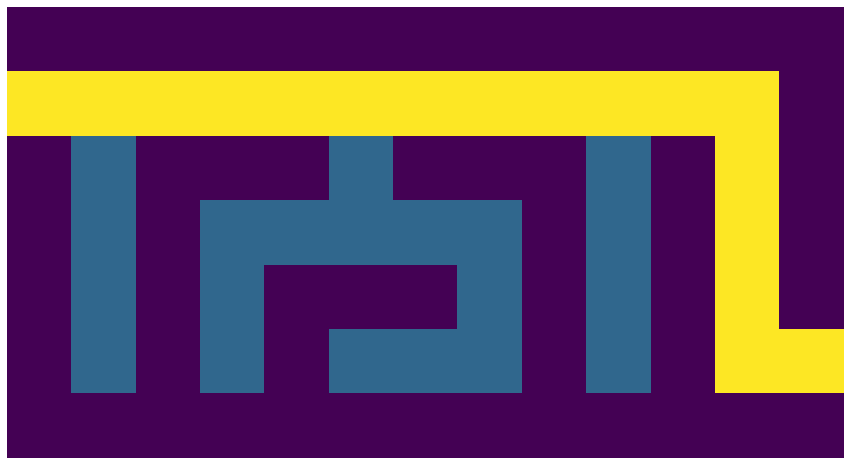

In [9]:
rows, cols = maze.shape
mazeSolver(maze, 1, 1, rows - 2, cols - 2)

True

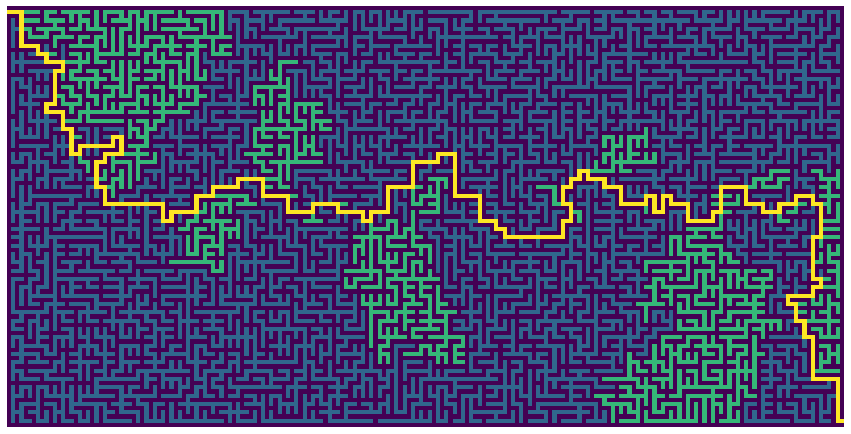

In [11]:
maze = mb.makeMaze(50, 100)
rows, cols = maze.shape
mazeSolver(maze, 1, 1, rows - 2, cols - 2)

In [12]:
maze = mb.makeMaze(100, 200)
print(maze.shape)
rows, cols = maze.shape
mazeSolver(maze, 1, 1, rows - 2, cols - 2)

(201, 401)


RecursionError: ignored

In [36]:
import pdb

def mazeSolver2(maze, rowI, colI, rowF, colF):
  stack = [(rowI, colI)]

  while stack:
    #pdb.set_trace()
    row, col = stack[-1]
    if row == rowF and col == colF:
      maze[row, col] = 3  # camino correcto (amarillo)
      drawMaze(maze)
      return
    elif maze[row, col] == 1:
      maze[row, col] = 3  # camino correcto (amarillo)
      nextSteps = [(row-1, col), (row, col+1), (row+1, col), (row, col-1)]
      for nextR, nextC in nextSteps:
        if maze[nextR, nextC] == 1:
          stack.append((nextR, nextC))
    elif maze[row, col] == 3:
      maze[row, col] = 2
      stack.pop()

(201, 401)


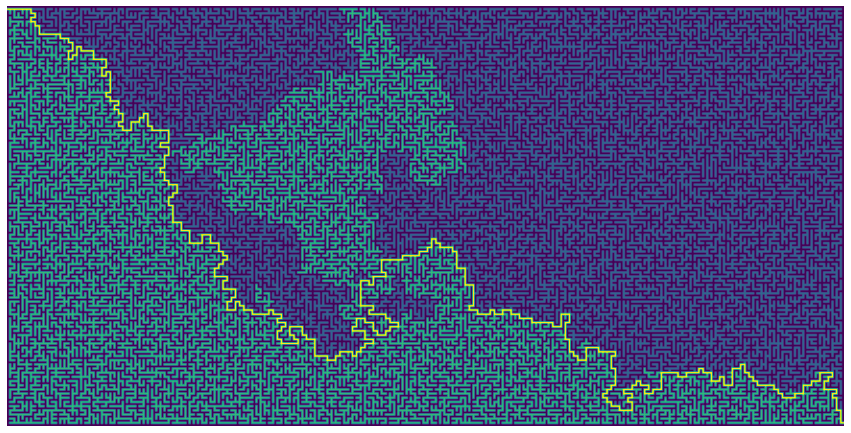

In [38]:
maze = mb.makeMaze(100, 200)
print(maze.shape)
rows, cols = maze.shape
mazeSolver2(maze, 1, 1, rows - 2, cols - 2)